# Problem Statement : 
### Write a program to implement the naïve Bayesian classifier for a iris dataset(Download the dataset link: https://archive.ics.uci.edu/ml/datasets/Iris ). Compute the accuracy of the classifier, considering few test data sets.


# About Iris dataset

The iris dataset contains the following data

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)
- sepal_length: Sepal length, in centimeters, used as input.
- sepal_width: Sepal width, in centimeters, used as input.
- petal_length: Petal length, in centimeters, used as input.
- petal_width: Petal width, in centimeters, used as input.
- class: Iris Setosa, Versicolor, or Virginica, used as the target.

# Contents

### Data Preprocessing
- Include Libraries
- Import DataSet
- Handle Missing Value

### Data Visualization
- Scatterplot
- Pairplot
- Barplot
- Violin
- Areaplot
- Correlation
Feature Engineering

### Machine learning Model
- Naive Bayes

# 1. Data Preprocessing

##### Importing pandas,numpy,matplotlib and Seaborn module

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Iris data set

In [2]:
iris=pd.read_csv('Iris.csv')

##### Displaying Head

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This data set has three varities of Iris plant.

In [5]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


As we can see above data distribution of data points in each class is equal so Iris is a balanced dataset as the number of data points for every class is 50.

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### Removing the unneeded column

In [7]:
iris.drop(columns="Id",inplace=True)

Checking if there are any missing values.

In [8]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is not any missing value in this dataset

# 2. Data Visualization

### 2.1 Scatterplot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis we can plot the scatter plot between any two features. I’am taking an example of petal length and petal width.

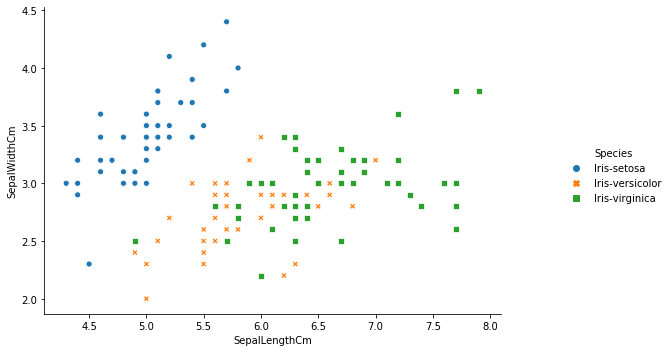

In [10]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

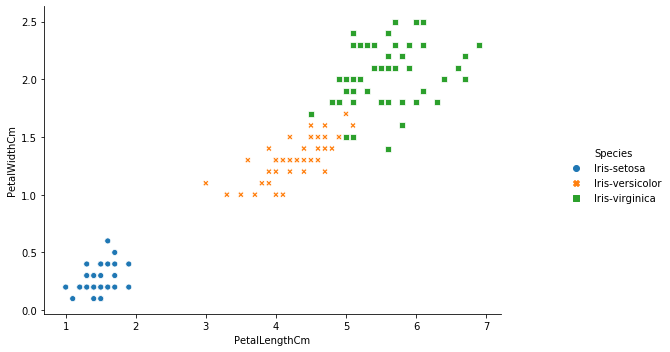

In [11]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

### 2.2 Pairplot
Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. Pair plot gives scatter plot of different features. Pair plot for iris data set.

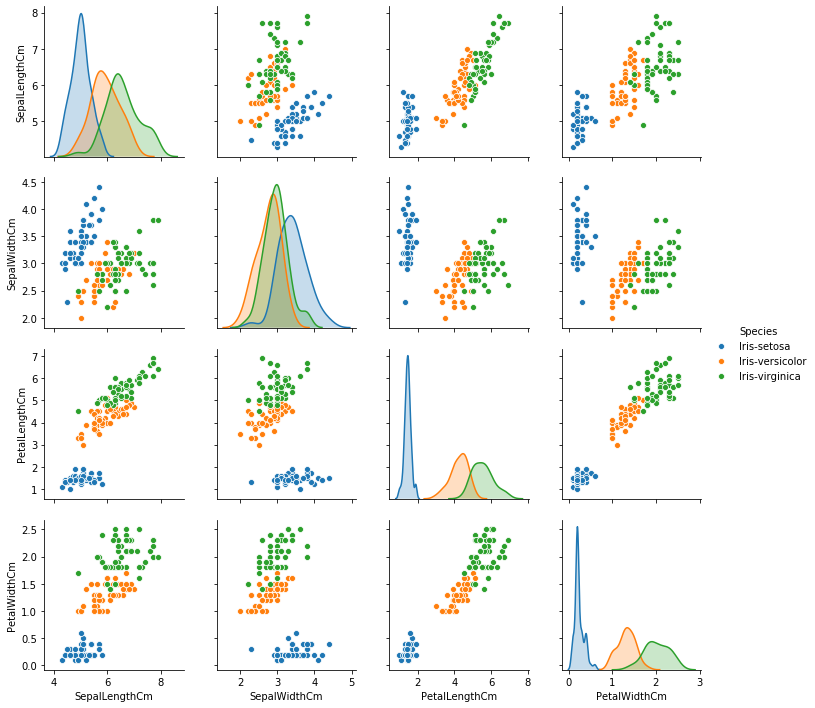

In [12]:
sns.pairplot(iris,hue="Species")
plt.show()

From the graph we can see the scatter plot between the any two features and the distributions. From the distributions above peatl length is separating the iris setosa from remaining. From plot between petal length and petal width we can separate the flowers

### 2.3 BoxPlot
Boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

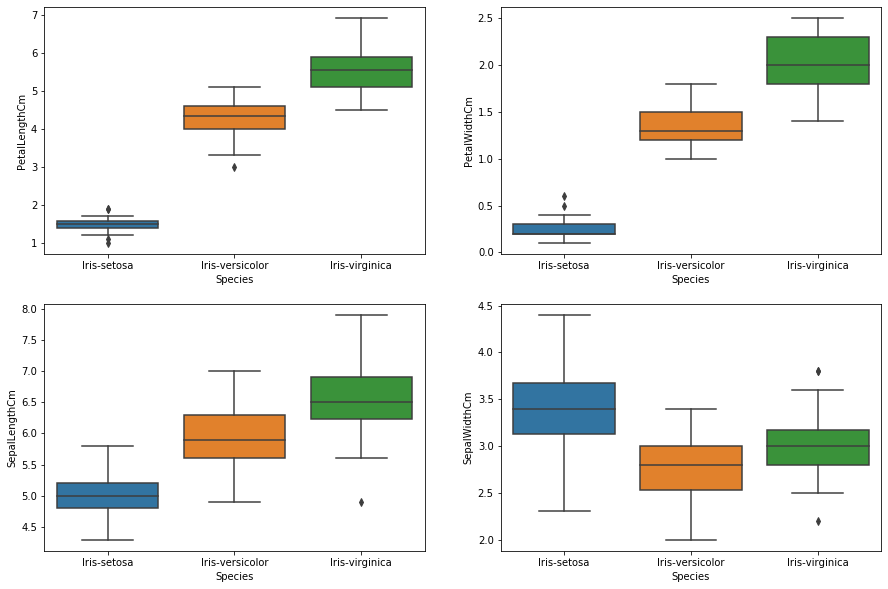

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

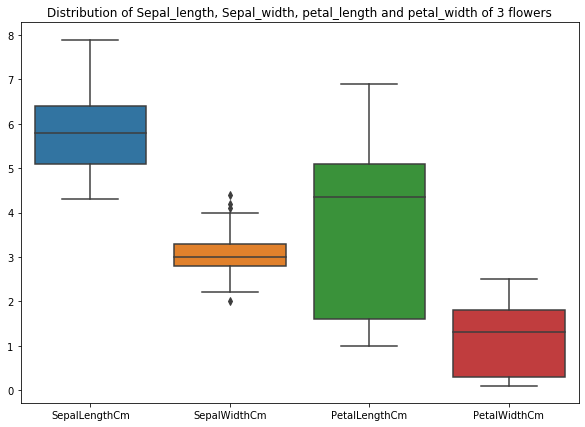

In [14]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

### 2.4 Violin
Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis. The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

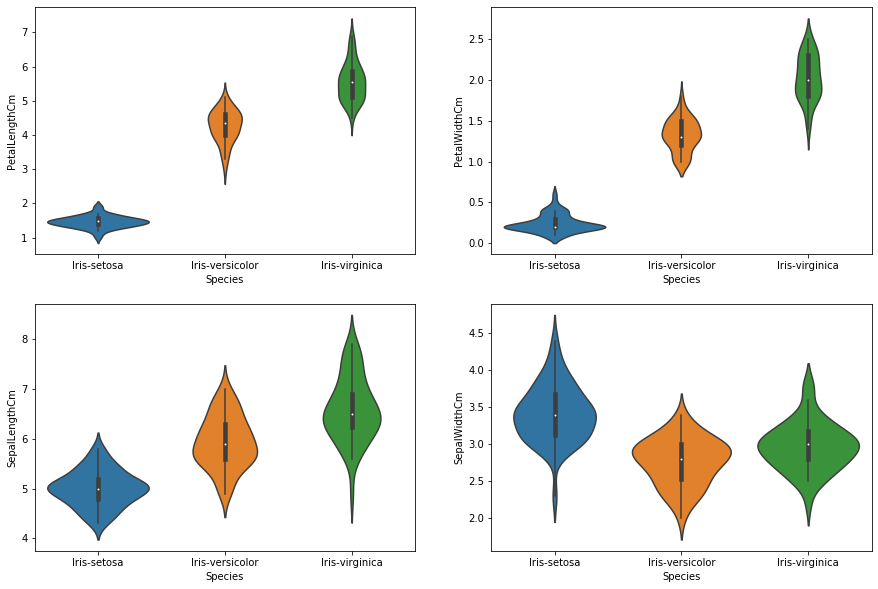

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

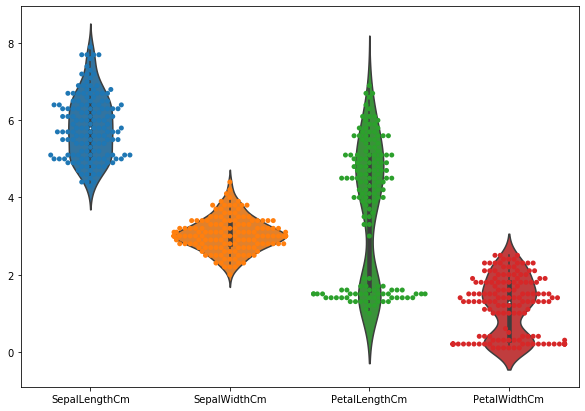

In [16]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot( data=iris)
plt.show()

### 2.5 Area Plot
Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

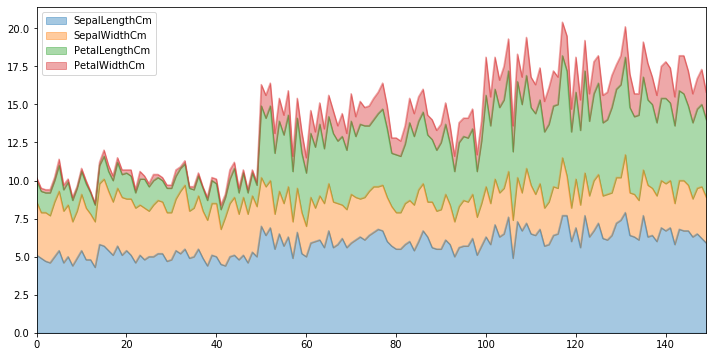

In [17]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

### 2.6 Correlation
Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [18]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


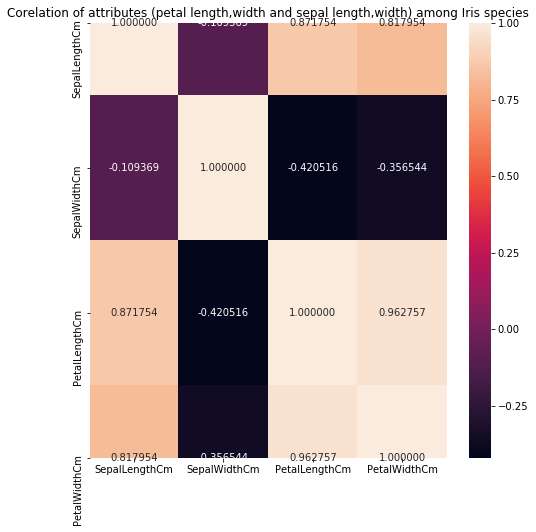

In [19]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

### Observation:

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

# Dividing data into features and labels¶

In [20]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

### Label encoding
As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

In [22]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Splitting The Data into Training And Testing Dataset

In [23]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Gaussian Naive Bayes:
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

In [24]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


As we see our Model is giving 100% Accuraccy for Naive Bayes.

### Observations:
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented Naive Bayes Algorithm for Machine Learning. Since the dataset is small with very few features.

# Result: 
### Implementation for a Iris dataset using Naïve Bayesian Classifier was successfully executed with 100% Accurray.